Connected to thermal (Python 3.11.5)

In [1]:
# -*- coding: utf-8 -*-
# Go back to root directory of project.
%cd ../

/home/gramos/Projects/MIIA-A23/code/mercury-duckling


/home/gramos/.pyenv/versions/3.11.5/envs/thermal/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import matplotlib.pyplot as plt
from rich.progress import track
root = "../data/_500_per_folder/merged_dataset_delam/"

# Pipeline: SAM 

In [4]:
from mercury_duckling.configs import SAM_THERMAL
from mercury_duckling.pipelines.sam_interactive import SamInteractiveTest

In [5]:
SAM_THERMAL["dataset"]["root"] = root
pipeline = SamInteractiveTest(SAM_THERMAL)
pipeline.on_experiment_start(pipeline)

sam_ious = test_pipeline(pipeline)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Output()

# Pipeline: RITM

In [6]:
import sys

sys.path.append("./mercury_duckling/models/")

from mercury_duckling.configs import RITM_THERMAL
from mercury_duckling.pipelines.ritm_interactive import RitmInteractiveTest

In [7]:
RITM_THERMAL["dataset"]["root"] = root
pipeline = RitmInteractiveTest(RITM_THERMAL)
pipeline.on_experiment_start(pipeline)

ritm_ious = test_pipeline(pipeline)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Output()

/home/gramos/.pyenv/versions/3.11.5/envs/thermal/lib/python3.11/site-packages/torch/functional.py:504: UserWarning:
torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at
../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

# Pipeline: Unet

In [8]:
import sys
sys.path.append("./mercury_duckling/models/inter_unet")

from mercury_duckling.configs import UNET_THERMAL
from mercury_duckling.pipelines.unet_interactive import UnetInteractiveTest

In [9]:
UNET_THERMAL["dataset"]["root"] = root
pipeline = UnetInteractiveTest(UNET_THERMAL)
pipeline.on_experiment_start(pipeline)

unet_ious = test_pipeline(pipeline)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
modifying input layer


Output()

# Results

In [5]:
sam_ious = np.loadtxt("../../results/interactive/colormap_test/greys/sam_means.csv")
ritm_ious = np.loadtxt("../../results/interactive/colormap_test/greys/ritm_means.csv")
unet_ious = np.loadtxt("../../results/interactive/colormap_test/greys/unet_means.csv")

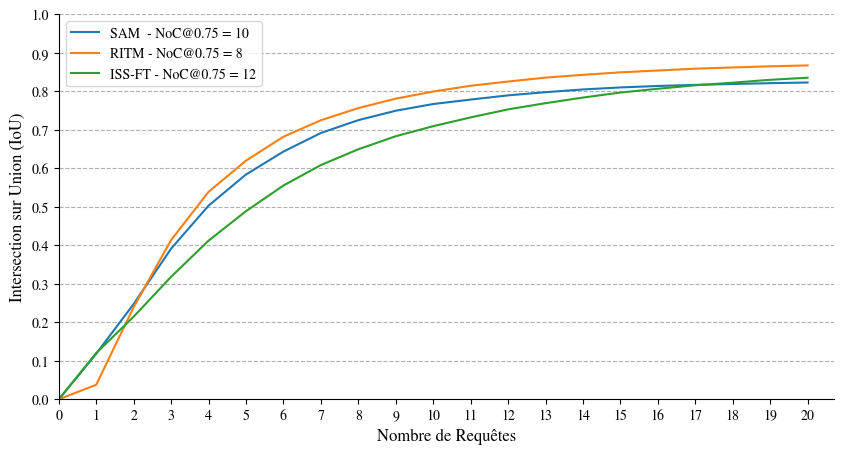

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
for ious in [sam_ious, ritm_ious, unet_ious]:
    ious = np.array(ious)
    # means = ious.mean(axis=0)
    ax.plot(ious)
ax.set_xlabel("Nombre de Requêtes", fontsize=12)
ax.set_ylabel("Intersection sur Union (IoU)", fontsize=12)
ax.set_xticks(range(21))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim([0, 1])
ax.set_xlim([0, 20.7])
ax.spines[['right', 'top']].set_visible(False)
plt.legend([
    f"SAM  - NoC@0.75 = {(sam_ious < 0.75).sum()}", 
    f"RITM - NoC@0.75 = {(ritm_ious < 0.75).sum()}",
    f"ISS-FT - NoC@0.75 = {(unet_ious < 0.75).sum()}"
])
plt.grid(axis='y', linestyle='--')
plt.show()